In [1]:
import os
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

import sys

sys.path.insert(0, "build")
import _autoneuronet as ann

# import autoneuronet as ann

/Users/rishabalagharu/.pyenv/versions/3.13.7/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Moons Classification with Activation Functions


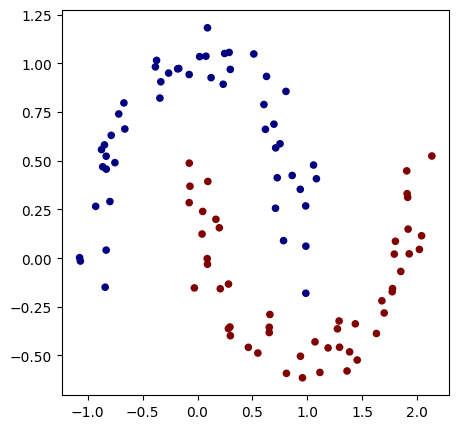

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [3]:
def numpy_to_matrix(numpy_array: np.ndarray) -> ann.Matrix:
    numpy_array = np.asarray(numpy_array, dtype=float)

    if numpy_array.ndim == 1:
        numpy_array = numpy_array.reshape(-1, 1)
    elif numpy_array.ndim != 2:
        raise ValueError("Please pass in a 1D or 2D array")

    rows, cols = numpy_array.shape
    matrix = ann.Matrix(rows, cols)

    for i in range(rows):
        for j in range(cols):
            matrix[i, j] = float(numpy_array[i, j])

    return matrix

In [4]:
X_matrix = numpy_to_matrix(X)
y_matrix = numpy_to_matrix(y)

In [5]:
lr = 1e-2
epochs = 5000

model = ann.NeuralNetwork(
    [
        ann.Linear(2, 16, init="he"),
        ann.ReLU(),
        ann.Linear(16, 16, init="he"),
        ann.ReLU(),
        ann.Linear(16, 1, init="he"),
        ann.Sigmoid(),
    ]
)
optimizer = ann.GradientDescentOptimizer(learning_rate=lr, model=model)

model

NeuralNetwork =
Linear(2, 16)
ReLU()
Linear(16, 16)
ReLU()
Linear(16, 1)
Sigmoid()

In [6]:
# Training Loop

for epoch in tqdm(
    range(epochs), desc="Training the moons classification Neural Network"
):
    optimizer.resetGrad()

    # Forward pass
    y_pred = model.forward(X_matrix)

    # Calculate the loss
    loss = ann.BCELoss(y_matrix, y_pred)
    loss_val = loss.getVal()

    # Backpropagation
    loss.setGrad(1.0)
    loss.backward()
    optimizer.optimize()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1} | Train Loss: {loss_val}")

Training the moons classification Neural Network:   1%|          | 27/5000 [00:00<00:37, 131.77it/s]

Epoch: 1 | Train Loss: 1.1828040021889539


Training the moons classification Neural Network:   2%|▏         | 115/5000 [00:00<00:38, 126.51it/s]

Epoch: 101 | Train Loss: 0.5135502629480899


Training the moons classification Neural Network:   5%|▍         | 228/5000 [00:01<00:35, 133.11it/s]

Epoch: 201 | Train Loss: 0.39447911543946523


Training the moons classification Neural Network:   7%|▋         | 326/5000 [00:02<00:35, 131.49it/s]

Epoch: 301 | Train Loss: 0.3365292502432201


Training the moons classification Neural Network:   8%|▊         | 422/5000 [00:03<00:35, 128.95it/s]

Epoch: 401 | Train Loss: 0.3035110999246085


Training the moons classification Neural Network:  10%|█         | 517/5000 [00:03<00:34, 128.92it/s]

Epoch: 501 | Train Loss: 0.2836280866883504


Training the moons classification Neural Network:  12%|█▏        | 621/5000 [00:04<00:39, 110.90it/s]

Epoch: 601 | Train Loss: 0.27066631665702845


Training the moons classification Neural Network:  14%|█▍        | 716/5000 [00:05<00:33, 127.81it/s]

Epoch: 701 | Train Loss: 0.26167228828837585


Training the moons classification Neural Network:  16%|█▋        | 824/5000 [00:06<00:32, 129.11it/s]

Epoch: 801 | Train Loss: 0.2550334471597224


Training the moons classification Neural Network:  18%|█▊        | 922/5000 [00:07<00:30, 133.12it/s]

Epoch: 901 | Train Loss: 0.24981211868974892


Training the moons classification Neural Network:  20%|██        | 1025/5000 [00:08<00:32, 121.06it/s]

Epoch: 1001 | Train Loss: 0.24545792322261448


Training the moons classification Neural Network:  22%|██▏       | 1122/5000 [00:08<00:29, 131.22it/s]

Epoch: 1101 | Train Loss: 0.2415952695445064


Training the moons classification Neural Network:  24%|██▍       | 1220/5000 [00:09<00:29, 129.60it/s]

Epoch: 1201 | Train Loss: 0.23800282505453585


Training the moons classification Neural Network:  26%|██▋       | 1323/5000 [00:10<00:34, 105.14it/s]

Epoch: 1301 | Train Loss: 0.23464165628238334


Training the moons classification Neural Network:  28%|██▊       | 1420/5000 [00:11<00:33, 106.70it/s]

Epoch: 1401 | Train Loss: 0.23146867005717106


Training the moons classification Neural Network:  30%|███       | 1522/5000 [00:12<00:27, 125.83it/s]

Epoch: 1501 | Train Loss: 0.22834598865304254


Training the moons classification Neural Network:  33%|███▎      | 1626/5000 [00:13<00:27, 123.85it/s]

Epoch: 1601 | Train Loss: 0.2253035008864669


Training the moons classification Neural Network:  34%|███▍      | 1722/5000 [00:13<00:25, 129.48it/s]

Epoch: 1701 | Train Loss: 0.22240298076096995


Training the moons classification Neural Network:  36%|███▋      | 1819/5000 [00:14<00:25, 126.38it/s]

Epoch: 1801 | Train Loss: 0.2194490201968773


Training the moons classification Neural Network:  38%|███▊      | 1923/5000 [00:15<00:25, 122.91it/s]

Epoch: 1901 | Train Loss: 0.21660011192852974


Training the moons classification Neural Network:  40%|████      | 2018/5000 [00:16<00:23, 129.07it/s]

Epoch: 2001 | Train Loss: 0.2137835538460444


Training the moons classification Neural Network:  42%|████▏     | 2115/5000 [00:16<00:22, 131.11it/s]

Epoch: 2101 | Train Loss: 0.21075718512481992


Training the moons classification Neural Network:  44%|████▍     | 2221/5000 [00:17<00:21, 127.18it/s]

Epoch: 2201 | Train Loss: 0.20757885758792022


Training the moons classification Neural Network:  46%|████▋     | 2315/5000 [00:18<00:21, 125.91it/s]

Epoch: 2301 | Train Loss: 0.20446782602844732


Training the moons classification Neural Network:  48%|████▊     | 2419/5000 [00:19<00:21, 117.82it/s]

Epoch: 2401 | Train Loss: 0.20117457747875325


Training the moons classification Neural Network:  50%|█████     | 2513/5000 [00:20<00:19, 126.24it/s]

Epoch: 2501 | Train Loss: 0.19796040566092657


Training the moons classification Neural Network:  52%|█████▏    | 2617/5000 [00:20<00:20, 118.32it/s]

Epoch: 2601 | Train Loss: 0.1947155366039084


Training the moons classification Neural Network:  54%|█████▍    | 2718/5000 [00:21<00:21, 103.84it/s]

Epoch: 2701 | Train Loss: 0.19148870694044987


Training the moons classification Neural Network:  56%|█████▋    | 2814/5000 [00:22<00:22, 96.10it/s] 

Epoch: 2801 | Train Loss: 0.18766149270225863


Training the moons classification Neural Network:  58%|█████▊    | 2919/5000 [00:23<00:20, 103.63it/s]

Epoch: 2901 | Train Loss: 0.18391070159575848


Training the moons classification Neural Network:  60%|██████    | 3008/5000 [00:24<00:16, 123.32it/s]

Epoch: 3001 | Train Loss: 0.18011181468378493


Training the moons classification Neural Network:  62%|██████▏   | 3119/5000 [00:25<00:19, 97.76it/s] 

Epoch: 3101 | Train Loss: 0.17602262325569618


Training the moons classification Neural Network:  64%|██████▍   | 3212/5000 [00:26<00:19, 89.88it/s] 

Epoch: 3201 | Train Loss: 0.17224852705881932


Training the moons classification Neural Network:  66%|██████▋   | 3316/5000 [00:27<00:15, 107.19it/s]

Epoch: 3301 | Train Loss: 0.16842133471728954


Training the moons classification Neural Network:  68%|██████▊   | 3414/5000 [00:28<00:16, 97.67it/s] 

Epoch: 3401 | Train Loss: 0.1645318561866645


Training the moons classification Neural Network:  70%|███████   | 3521/5000 [00:29<00:13, 111.26it/s]

Epoch: 3501 | Train Loss: 0.16052425111386476


Training the moons classification Neural Network:  72%|███████▏  | 3612/5000 [00:30<00:13, 100.57it/s]

Epoch: 3601 | Train Loss: 0.15648791645537383


Training the moons classification Neural Network:  74%|███████▍  | 3718/5000 [00:31<00:11, 108.99it/s]

Epoch: 3701 | Train Loss: 0.15246405418967537


Training the moons classification Neural Network:  76%|███████▋  | 3813/5000 [00:32<00:10, 109.94it/s]

Epoch: 3801 | Train Loss: 0.14848515868570547


Training the moons classification Neural Network:  78%|███████▊  | 3921/5000 [00:33<00:09, 112.10it/s]

Epoch: 3901 | Train Loss: 0.14452023590047763


Training the moons classification Neural Network:  80%|████████  | 4017/5000 [00:34<00:08, 117.15it/s]

Epoch: 4001 | Train Loss: 0.14052490224891911


Training the moons classification Neural Network:  82%|████████▏ | 4115/5000 [00:35<00:07, 119.68it/s]

Epoch: 4101 | Train Loss: 0.1364855102097038


Training the moons classification Neural Network:  84%|████████▍ | 4222/5000 [00:36<00:07, 106.78it/s]

Epoch: 4201 | Train Loss: 0.13235724392841575


Training the moons classification Neural Network:  86%|████████▋ | 4318/5000 [00:37<00:07, 92.34it/s] 

Epoch: 4301 | Train Loss: 0.12829633698454895


Training the moons classification Neural Network:  88%|████████▊ | 4417/5000 [00:38<00:05, 105.07it/s]

Epoch: 4401 | Train Loss: 0.12432675328878448


Training the moons classification Neural Network:  90%|█████████ | 4522/5000 [00:39<00:04, 107.35it/s]

Epoch: 4501 | Train Loss: 0.12038176389267508


Training the moons classification Neural Network:  92%|█████████▏| 4623/5000 [00:40<00:03, 121.59it/s]

Epoch: 4601 | Train Loss: 0.11648203177614092


Training the moons classification Neural Network:  94%|█████████▍| 4722/5000 [00:41<00:02, 112.37it/s]

Epoch: 4701 | Train Loss: 0.11265042213665495


Training the moons classification Neural Network:  96%|█████████▋| 4823/5000 [00:41<00:01, 123.36it/s]

Epoch: 4801 | Train Loss: 0.10875735364528871


Training the moons classification Neural Network:  98%|█████████▊| 4914/5000 [00:42<00:00, 121.35it/s]

Epoch: 4901 | Train Loss: 0.10487297177271344


Training the moons classification Neural Network: 100%|██████████| 5000/5000 [00:43<00:00, 114.78it/s]


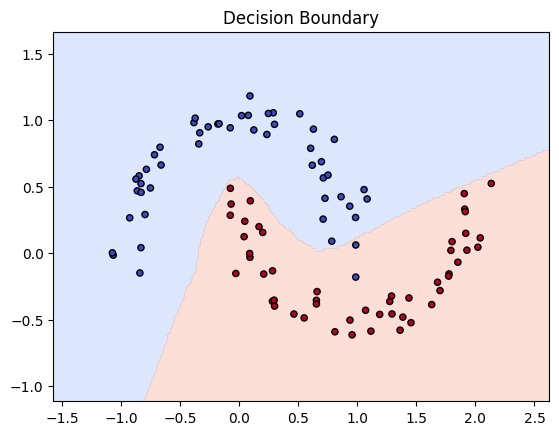

In [7]:
X = np.asarray(X)
y = np.asarray(y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

grid_step = 0.02

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step),
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_mat = numpy_to_matrix(grid)
preds = model.forward(grid_mat)

Z = np.array([preds[i, 0].getVal() for i in range(preds.rows)])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="coolwarm", edgecolor="k")
plt.title("Decision Boundary")
plt.show()

In [8]:
os.makedirs("models", exist_ok=True)
model.saveWeights("models/moons_model.bin")

In [ ]:
model.loadWeights("models/moons_model.bin")